In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, confusion_matrix

from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/heart_data.csv', sep=";")

In [3]:
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       20 non-null     int64 
 1   max_rate  20 non-null     int64 
 2   angina    20 non-null     object
 3   heart     20 non-null     object
dtypes: int64(2), object(2)
memory usage: 772.0+ bytes


,age,max_rate,angina,heart
0,50,126,Yes,presence
1,49,126,No,presence
2,46,144,No,presence
3,49,139,No,presence
4,62,154,Yes,presence
5,35,156,Yes,presence
6,67,160,No,absence
7,65,140,No,absence
8,47,143,No,absence
9,58,165,No,absence


In [4]:
df['angina'].replace({'Yes':1 , 'No':0}, inplace=True)
#df['heart'].replace({'presence':1 , 'absence':0}, inplace=True)

In [5]:
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       20 non-null     int64 
 1   max_rate  20 non-null     int64 
 2   angina    20 non-null     int64 
 3   heart     20 non-null     object
dtypes: int64(3), object(1)
memory usage: 772.0+ bytes


,age,max_rate,angina,heart
0,50,126,1,presence
1,49,126,0,presence
2,46,144,0,presence
3,49,139,0,presence
4,62,154,1,presence
5,35,156,1,presence
6,67,160,0,absence
7,65,140,0,absence
8,47,143,0,absence
9,58,165,0,absence


In [6]:
X = df.drop(columns='heart')
y = df['heart']

In [7]:
y

0     presence
1     presence
2     presence
3     presence
4     presence
5     presence
6      absence
7      absence
8      absence
9      absence
10     absence
11     absence
12     absence
13     absence
14     absence
15     absence
16     absence
17     absence
18     absence
19     absence
Name: heart, dtype: object

In [8]:
logreg = LogisticRegression(penalty=None, solver='newton-cholesky')
logreg.fit(X,y)
y_pred = logreg.predict(X)
y_pred_proba = logreg.predict_proba(X)

In [9]:
accuracy_score(y,y_pred)

0.8

In [10]:
for (a, b) in zip(y,y_pred_proba): print(a, b)

presence [0.12105267 0.87894733]
presence [0.41845463 0.58154537]
presence [0.60779725 0.39220275]
presence [0.62179248 0.37820752]
presence [0.78664148 0.21335852]
presence [0.12344514 0.87655486]
absence [0.98359042 0.01640958]
absence [0.92896312 0.07103688]
absence [0.62249135 0.37750865]
absence [0.9637516 0.0362484]
absence [0.14158061 0.85841939]
absence [0.89424612 0.10575388]
absence [0.89633627 0.10366373]
absence [0.59433957 0.40566043]
absence [0.87562295 0.12437705]
absence [0.94163353 0.05836647]
absence [0.8272801 0.1727199]
absence [0.86181451 0.13818549]
absence [0.86287322 0.13712678]
absence [0.926293 0.073707]


In [11]:
roc_auc_score(y,y_pred_proba[:,1])

0.9047619047619048

In [12]:
cohen_kappa_score(y, y_pred)

0.4736842105263158

In [13]:
roc_df = pd.DataFrame({'target': y , 'probas': y_pred_proba[:,1]})
roc_df

,target,probas
0,presence,0.878947
1,presence,0.581545
2,presence,0.392203
3,presence,0.378208
4,presence,0.213359
5,presence,0.876555
6,absence,0.016410
7,absence,0.071037
8,absence,0.377509
9,absence,0.036248


In [14]:
roc_df.sort_values(by='probas', inplace=True, ascending=False)
roc_df.reset_index(inplace=True, drop=True)
roc_df

,target,probas
0,presence,0.878947
1,presence,0.876555
2,absence,0.858419
3,presence,0.581545
4,absence,0.405660
5,presence,0.392203
6,presence,0.378208
7,absence,0.377509
8,presence,0.213359
9,absence,0.172720


In [15]:
for j in roc_df.index :
    tp = 0
    fp = 0
    for i in range(j+1) :
        #print(i,j)
        #print(roc_df.loc[i,'target'], roc_df.loc[j,'probas'])
        if roc_df.loc[i,'target'] == 'presence':
            tp += 1
        if roc_df.loc[i,'target'] == 'absence':
            fp += 1
    roc_df.loc[i,'tp'] = tp
    roc_df.loc[i,'fp'] = fp

In [16]:
roc_df

,target,probas,tp,fp
0,presence,0.878947,1.0,0.0
1,presence,0.876555,2.0,0.0
2,absence,0.858419,2.0,1.0
3,presence,0.581545,3.0,1.0
4,absence,0.405660,3.0,2.0
5,presence,0.392203,4.0,2.0
6,presence,0.378208,5.0,2.0
7,absence,0.377509,5.0,3.0
8,presence,0.213359,6.0,3.0
9,absence,0.172720,6.0,4.0


In [17]:
nb_neg, nb_pos = roc_df['target'].value_counts()
print(nb_neg, nb_pos)

14 6


In [18]:
roc_df['tpr'] = roc_df['tp']/nb_pos
roc_df['fpr'] = roc_df['fp']/nb_neg
roc_df

,target,probas,tp,fp,tpr,fpr
0,presence,0.878947,1.0,0.0,0.166667,0.000000
1,presence,0.876555,2.0,0.0,0.333333,0.000000
2,absence,0.858419,2.0,1.0,0.333333,0.071429
3,presence,0.581545,3.0,1.0,0.500000,0.071429
4,absence,0.405660,3.0,2.0,0.500000,0.142857
5,presence,0.392203,4.0,2.0,0.666667,0.142857
6,presence,0.378208,5.0,2.0,0.833333,0.142857
7,absence,0.377509,5.0,3.0,0.833333,0.214286
8,presence,0.213359,6.0,3.0,1.000000,0.214286
9,absence,0.172720,6.0,4.0,1.000000,0.285714


In [19]:
roc = roc_df[['fpr','tpr']]
row_0 = pd.DataFrame({'fpr':[0],'tpr':[0]})
roc = pd.concat([row_0,roc])
roc.reset_index(inplace=True)

In [20]:
roc

,index,fpr,tpr
0,0,0.000000,0.000000
1,0,0.000000,0.166667
2,1,0.000000,0.333333
3,2,0.071429,0.333333
4,3,0.071429,0.500000
5,4,0.142857,0.500000
6,5,0.142857,0.666667
7,6,0.142857,0.833333
8,7,0.214286,0.833333
9,8,0.214286,1.000000


In [21]:
print([i for i in range(len(roc)-1)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [22]:
for i in range(1,len(roc)) :
    roc.loc[i,'area'] = (roc.loc[i,'fpr']-roc.loc[i-1,'fpr'])*(roc.loc[i,'tpr']+roc.loc[i-1,'tpr'])/2

roc

,index,fpr,tpr,area
0,0,0.000000,0.000000,NaN
1,0,0.000000,0.166667,0.000000
2,1,0.000000,0.333333,0.000000
3,2,0.071429,0.333333,0.023810
4,3,0.071429,0.500000,0.000000
5,4,0.142857,0.500000,0.035714
6,5,0.142857,0.666667,0.000000
7,6,0.142857,0.833333,0.000000
8,7,0.214286,0.833333,0.059524
9,8,0.214286,1.000000,0.000000


In [23]:
AUC = roc['area'].sum()
AUC

0.9047619047619048

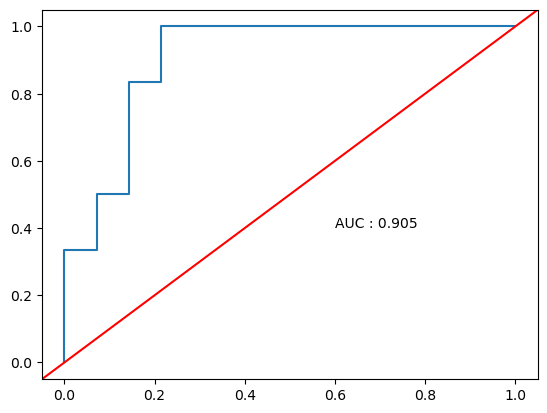

In [24]:
plt.plot(roc['fpr'], roc['tpr'])
# plt.xlim(-0.01,1.01)
# plt.ylim(-0.01,1.01)
plt.axline((0, 0), slope=1, color = 'red')
plt.text(0.6,0.4,f'AUC : {AUC:.3f}')
plt.show()

In [25]:
df_obs = pd.crosstab(y, y_pred, rownames=['actual'], colnames=['predicted'])

In [26]:
df_obs

predicted,absence,presence
actual,,
absence,13,1
presence,3,3


In [27]:
chi1, p, dof, df_exp = chi2_contingency(df_obs)

In [28]:
df_exp

array([[11.2,  2.8],
       [ 4.8,  1.2]])

In [29]:
p_o = np.trace(df_obs) / len(y)
p_e = np.trace(df_exp) / len(y)

Kappa = (p_o - p_e) / (1-p_e)
Kappa

0.47368421052631604